In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ruta='./Fitting2.txt'

In [3]:
numbers=[]
with open(ruta, "r", encoding="utf-8") as f:
    for line in f:
        line2=[float(x) for x in line.split("\t")]
        numbers.append(line2)
numbers=np.array(numbers)

In [55]:
thetaH=np.array([numbers[i][0] for i in range(0,numbers.shape[0])])
Hr=np.array([numbers[i][1]for i in range(0,numbers.shape[0])])

In [70]:
thetaH_rad=thetaH*np.pi/180
thetaH_rad

array([90., 85., 80., 75., 70., 65., 60., 55., 50., 45., 40., 35., 30.,
       25., 20., 15., 10.,  5.,  0.])

In [57]:
Hr

array([2.3179, 2.3026, 2.3319, 2.3653, 2.4345, 2.5137, 2.6138, 2.7601,
       2.9222, 3.0981, 3.3646, 3.6393, 3.9168, 4.332 , 4.6016, 4.9356,
       5.2205, 5.3954, 5.4483])

In [11]:
Meff=1.7

def f(x,thetaH,Hr):
  funcion=Meff*np.sin(2*x)-2*Hr*np.sin(x-thetaH)
  return funcion

def sign(x):
  if x>0:
    return 1
  elif x<0:
    return -1
  else:
    return 0

Método de Bisección

In [12]:
def biseccion(f,a,b,eps,thetaH_rad,Hr):
  while True: 
    p=(a+b)/2
    if f(a,thetaH_rad,Hr)*f(p,thetaH_rad,Hr)<0: b=p
    if f(a,thetaH_rad,Hr)*f(p,thetaH_rad,Hr)>0: a=p
    if np.abs(f(p,thetaH_rad,Hr))<eps: break
  return (p)

In [66]:
thetaM_biseccion=[]
for i in range(0,len(Hr)-1):
    thetaM_biseccion.append(biseccion(f,0,np.pi/2,1e-6,thetaH_rad[i],Hr[i]))
    

In [67]:
thetaM_biseccion.append(0)
thetaM_biseccion

[1.5707962331681395,
 1.5205629500759814,
 1.4696004081729808,
 1.4176010435621529,
 1.3630995974953033,
 1.306082774972928,
 1.2454684379367762,
 1.1790327636528466,
 1.1074212149844023,
 1.030008926954738,
 0.9410067699205081,
 0.8449050831509399,
 0.7414969515129007,
 0.6234313638015543,
 0.506417766332681,
 0.38096727453043655,
 0.2537431174421996,
 0.12680358569546474,
 0]

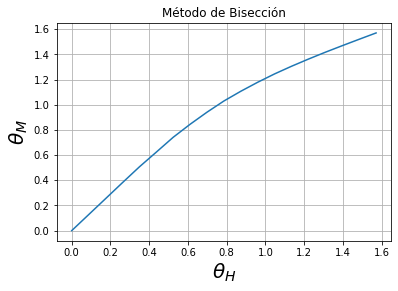

In [73]:
plt.plot(thetaH_rad,thetaM_biseccion)
plt.title("Método de Bisección")
plt.xlabel(r'$\theta_{H}$',size=20)
plt.ylabel(r'$\theta_{M}$',size=20)
plt.grid()
plt.show()

Método de Newton-Rhapson:

Se tiene que la función es:

$4\pi M_{eff}sin(2\theta_{M})=2H_{R}sin(\theta_{M}-\theta_{H})$

Por tanto, la derivada con respecto a $\theta_{M}$ es:

$2(4\pi M_{eff})cos(2\theta_{M})=2H_{R}cos(\theta_{M}-\theta_{H})$

In [27]:
def derivF(x,thetaH,Hr):
    funcion=2*Meff*np.cos(2*x)-2*Hr*np.cos(x-thetaH)
    return funcion

In [29]:
def newton(f,df,p0,eps,thetaH,Hr): 
  while True: 
    p=p0-f(p0,thetaH,Hr)/df(p0,thetaH,Hr)
    if np.abs(p-p0)<eps: break 
    p0=p
  return (p)

In [31]:
thetaM_newton=[]
for i in range(0,len(Hr)):
    thetaM_newton.append(newton(f,derivF,1,1e-4,thetaH_rad[i],Hr[i]))

In [61]:
newton(f,derivF,1,1e-4,thetaH_rad[18],Hr[18])
thetaM_newton.append(0)

In [62]:
thetaM_newton

[1.5707963267948966,
 1.520563015075206,
 1.469600325545324,
 1.417600986771262,
 1.363099486149752,
 1.3060826685380915,
 1.245468546079572,
 1.17903263776583,
 1.1074212007533684,
 1.030009007351685,
 0.9410068165393886,
 0.8449052006473735,
 0.741496888634093,
 0.6234312418075376,
 0.5064176961423016,
 0.38096730321698,
 0.2537431258680072,
 0.1268035180760085,
 0]

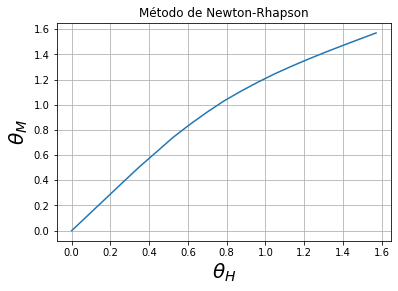

In [72]:
plt.plot(thetaH_rad,thetaM_newton)
plt.title("Método de Newton-Rhapson")
plt.xlabel(r'$\theta_{H}$',size=20)
plt.ylabel(r'$\theta_{M}$',size=20)
plt.grid()
plt.show()